## **Importing the necessary Libraries & Modules**

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pathlib import Path
import os
import glob

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')

## **Setting The Environment**

In [2]:
# getting the cwd
working_dir = Path.cwd()
# getting the path of the src folder
src = working_dir.parents[1]
# setting the directory for the final datasets
final_data_dir = src / 'data' / 'final'
# directory for the raw data 
raw_data_dir = src / 'data' / 'raw'
# directory for the processed data 
processed_data_dir = src / 'data' / 'processed'

## **Merging all the datasets pertaining to GFS into one Data Frame**

In [3]:
# Totally there are 8 datasets pertaining to GFS
# saving their names in a list
bhopal_filenames = [file_name for file_name in glob.glob(str(raw_data_dir) + "/*.csv") if os.path.basename(file_name).startswith('GFS_Bhopal')]

# Combine all files in the list
gfs_df = pd.concat([pd.read_csv(f) for f in bhopal_filenames])
gfs_df['date'] = pd.to_datetime(gfs_df['date'],format='%y-%m-%d')

In [4]:
gfs_df.head()

,date,city,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface
0,2015-04-01,Bhopal,31.381519,0.005640,19.084161,4.671449,-0.277626,19.053919,0.0
1,2015-04-02,Bhopal,31.612318,0.006702,22.664057,5.663895,-0.951907,19.920647,0.0
2,2015-04-03,Bhopal,30.854070,0.006804,23.969701,5.704286,-0.857162,19.664423,0.0
3,2015-04-04,Bhopal,30.046127,0.008165,30.080859,2.575579,-1.547093,24.770628,0.0
4,2015-04-05,Bhopal,30.523074,0.007366,26.557658,-0.549178,-0.442961,23.765168,0.0


In [5]:
gfs_df.shape

(3147, 9)

In [6]:
gfs_df.tail()

,date,city,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface
343,2023-12-10,Bhopal,18.811834,0.006121,43.662294,-1.405728,-0.565707,12.593095,0.000389
344,2023-12-11,Bhopal,18.872122,0.006296,44.810857,-1.503734,-0.283899,14.011080,0.028797
345,2023-12-12,Bhopal,18.785527,0.005872,42.018555,-1.647457,-0.419264,13.332485,0.010552
346,2023-12-13,Bhopal,18.444809,0.005759,42.108677,-1.865238,-0.799219,14.464455,0.015756
347,2023-12-14,Bhopal,18.650056,0.005858,42.060450,-1.756230,-0.815621,13.921977,0.000171


In [7]:
gfs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m_above_ground,3147.0,1.120433e+15,6.285417e+16,14.319980,22.685267,26.001753,30.714626,3.526001e+18
specific_humidity_2m_above_ground,3147.0,1.275396e-02,1.544542e-01,0.002064,0.005188,0.007549,0.016433,8.668938e+00
relative_humidity_2m_above_ground,3147.0,4.543933e+01,2.475442e+01,6.948661,24.856172,39.345853,68.742206,9.153140e+01
u_component_of_wind_10m_above_ground,3147.0,1.591564e+00,4.930974e+00,-5.569351,-0.661148,1.344172,3.711401,2.420341e+02
v_component_of_wind_10m_above_ground,3147.0,-7.091064e-01,1.077224e+00,-4.556643,-1.405165,-0.806897,-0.071909,1.673568e+01
precipitable_water_entire_atmosphere,3147.0,3.034214e+01,1.836002e+01,4.866504,15.021756,22.526799,49.913735,6.688052e+01
total_precipitation_surface,3147.0,5.729789e-01,9.779145e-01,-0.970291,0.000981,0.035105,0.806079,7.303167e+00


In [8]:
# checking for null values
print(f'The number of null values in the GFS dataset are: {gfs_df.isna().sum().sum()}')

The number of null values in the GFS dataset are: 0


## **Loading the GLDAS dataset**

In [9]:
# loading the file path of the gldas dataset
gldas_file = os.path.join(raw_data_dir,'GLDAS_Bhopal_2010_2023.csv')
gldas_df = pd.read_csv(gldas_file)
gldas_df['date'] = pd.to_datetime(gldas_df['date'],format = '%y-%m-%d')

In [10]:
# Drop the columns that have all 0 values
gldas_df.drop(['SWE_tavg', 'SnowDepth_tavg', 'Qsb_tavg', 'Qsm_tavg', 'EvapSnow_tavg'], axis=1, inplace=True)
gldas_df.head()

,date,city,ACond_tavg,AvgSurfT_tavg,CanopInt_tavg,ECanop_tavg,ESoil_tavg,Evap_tavg,GWS_tavg,Lwnet_tavg,...,Qh_tavg,Qle_tavg,Qs_tavg,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg
0,2010-01-01,Bhopal,0.010088,287.688380,0.001156,2.932935e-08,0.000012,0.000015,883.827648,-90.931169,...,37.562870,35.926709,0.000000e+00,287.688380,1172.228199,288.400510,5.566383,151.129770,0.000002,1172.229304
1,2010-01-02,Bhopal,0.010061,289.268913,0.000401,2.920452e-09,0.000012,0.000015,883.432609,-68.572377,...,42.294629,36.103128,0.000000e+00,289.268913,1171.363238,287.930671,5.547952,145.878682,0.000002,1171.363680
2,2010-01-03,Bhopal,0.010747,292.449339,0.000948,7.901975e-09,0.000014,0.000017,883.026668,-53.388871,...,37.794927,42.585784,3.507778e-10,292.449339,1170.347264,287.320660,5.488808,141.945173,0.000003,1170.348275
3,2010-01-04,Bhopal,0.011983,289.668102,0.000724,1.918644e-08,0.000011,0.000013,882.605022,-76.923632,...,49.884944,33.185483,0.000000e+00,289.668102,1169.410008,286.805072,5.509292,146.034988,0.000002,1169.410822
4,2010-01-05,Bhopal,0.010241,287.474046,0.000275,1.576623e-09,0.000011,0.000013,882.173136,-91.107395,...,45.596330,32.737269,0.000000e+00,287.474046,1168.653461,286.480318,5.510678,153.171961,0.000002,1168.653736


In [11]:
gldas_df.tail()

,date,city,ACond_tavg,AvgSurfT_tavg,CanopInt_tavg,ECanop_tavg,ESoil_tavg,Evap_tavg,GWS_tavg,Lwnet_tavg,...,Qh_tavg,Qle_tavg,Qs_tavg,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg
4924,2023-06-26,Bhopal,0.014880,301.319386,0.010942,0.000002,0.000024,0.000028,821.132273,-3.098705,...,42.815345,68.294639,0.000004,301.319386,1119.148058,298.015849,6.533273,103.863962,0.000002,1119.159069
4925,2023-06-27,Bhopal,0.016214,301.113478,0.010765,0.000002,0.000026,0.000030,822.014210,0.347042,...,34.966429,74.206189,0.000018,301.113478,1123.364814,301.350545,6.898181,101.200953,0.000002,1123.375532
4926,2023-06-28,Bhopal,0.016272,300.568071,0.012465,0.000002,0.000031,0.000037,823.678898,4.282264,...,31.559352,90.448594,0.000053,300.568071,1134.990114,311.311238,7.512892,109.385402,0.000003,1135.002598
4927,2023-06-29,Bhopal,0.017152,300.438963,0.012693,0.000002,0.000028,0.000034,826.473011,4.832132,...,38.382987,84.663859,0.000030,300.438963,1144.042161,317.569183,7.319170,111.313468,0.000004,1144.054883
4928,2023-06-30,Bhopal,0.016794,300.249694,0.013172,0.000002,0.000025,0.000032,829.937107,1.440541,...,30.057209,79.849653,0.000008,300.249694,1151.335034,321.397936,7.022767,102.562258,0.000005,1151.348196


In [12]:
gldas_df.shape

(4929, 21)

In [13]:
# checking for null values
print(f'The number of null values in the gldas dataset is: {gldas_df.isna().sum().sum()}')

The number of null values in the gldas dataset is: 0


## **Loading the Bhopal Population dataset**

In [14]:
Pop_file = os.path.join(processed_data_dir,'Population data/Bhopal-population-2023-11-22.csv')
Pop_df = pd.read_csv(Pop_file)
Pop_df['date'] = pd.to_datetime(Pop_df['date'],format='%Y-%m-%d')
Pop_df.head()

,date,Population,Annual Change
0,1950-12-31,100000,NaN
1,1951-12-31,105000,5.00
2,1952-12-31,114000,8.57
3,1953-12-31,123000,7.89
4,1954-12-31,133000,8.13


In [15]:
Pop_df.tail()

,date,Population,Annual Change
81,2031-12-31,3075000,2.23
82,2032-12-31,3142000,2.18
83,2033-12-31,3211000,2.20
84,2034-12-31,3279000,2.12
85,2035-12-31,3348000,2.10


In [16]:
Pop_df.shape

(86, 3)

In [17]:
# finding the number of null values in the population data
print(f'The number of null values in the Population dataset is: {Pop_df.isna().sum().sum()}')

The number of null values in the Population dataset is: 1


## **Loading the Open Meteo API Weather dataset**

In [68]:
# Through research it was found that the older dataset for weather namely:Bhopal_Daily_Rainfall_Data_1970_2023.csv,
# was producing a lot of outliers in the final dataset,
# thus in place this dataset is being used: Bhopal_Precipitation_2015_2023.csv

Ppt_file = os.path.join(processed_data_dir,'Weather data\Bhopal_Precipitation_2015_2023.csv')
Ppt_df = pd.read_csv(Ppt_file)

In [69]:
Ppt_df.head()

,Unnamed: 0,date,precipitation_sum
0,0,2015-04-01,0.0
1,1,2015-04-02,0.0
2,2,2015-04-03,0.0
3,3,2015-04-04,0.0
4,4,2015-04-05,0.0


In [70]:
Ppt_df.tail()

,Unnamed: 0,date,precipitation_sum
3008,3008,2023-06-26,4.599999
3009,3009,2023-06-27,4.400000
3010,3010,2023-06-28,21.000000
3011,3011,2023-06-29,17.100000
3012,3012,2023-06-30,6.299999


In [71]:
Ppt_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [72]:
Ppt_df.head()

,date,precipitation_sum
0,2015-04-01,0.0
1,2015-04-02,0.0
2,2015-04-03,0.0
3,2015-04-04,0.0
4,2015-04-05,0.0


In [74]:
Ppt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               3013 non-null   object 
 1   precipitation_sum  3013 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.2+ KB


In [75]:
Ppt_df['date'] = pd.to_datetime(Ppt_df3['date'],format='%Y-%m-%d')

In [76]:
Ppt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               3013 non-null   datetime64[ns]
 1   precipitation_sum  3013 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 47.2 KB


In [77]:
Ppt_df.describe()

,precipitation_sum
count,3013.000000
mean,3.845105
std,12.596171
min,0.000000
25%,0.000000
50%,0.000000
75%,1.400000
max,274.700000


In [78]:
# checking for null values
print(f'The number of null values in the Precipitation dataset is: {Ppt_df.isna().sum().sum()}')

The number of null values in the Precipitation dataset is: 0


## **Checking for different info from the date column of the datasets**

### **Checking the date range**

In [79]:
print('The date range for the datasets are as follows:')
print("GFS: ", gfs_df['date'].min(), gfs_df['date'].max())
print("GLADS: ", gldas_df['date'].min(), gldas_df['date'].max())
print("Population: ", Pop_df['date'].min(), Pop_df['date'].max())
print("Weather: ", Ppt_df['date'].min(), Ppt_df['date'].max())


The date range for the datasets are as follows:
GFS:  2015-04-01 00:00:00 2023-12-14 00:00:00
GLADS:  2010-01-01 00:00:00 2023-06-30 00:00:00
Population:  1950-12-31 00:00:00 2035-12-31 00:00:00
Weather:  2015-04-01 00:00:00 2023-06-30 00:00:00


### **Checking the missing dates in the GFS dataset**

In [80]:
start_date = gfs_df['date'].min()
end_date = gfs_df['date'].max()

In [81]:
# creating a set of dates in between the start & end date
dates1 = set(elem.strftime('%Y-%m-%d') for elem in pd.date_range(start_date,end_date))
# creating another set for storing the dates actually present in the gfs_df
dates2 = set(elem.strftime('%Y-%m-%d') for elem in gfs_df['date'])

# using the set().difference to find out those dates present in dates1 which are not in dates2
missing_dates = list(dates1.difference(dates2))

print(f'There are {len(missing_dates)} missing dates in the gfs dataset')
print('They are as follows: ')
missing_dates

There are 33 missing dates in the gfs dataset
They are as follows: 


['2021-12-18',
 '2021-12-27',
 '2015-04-19',
 '2016-12-31',
 '2021-12-20',
 '2015-04-11',
 '2015-04-17',
 '2017-12-31',
 '2015-04-10',
 '2019-12-31',
 '2021-12-24',
 '2021-12-19',
 '2021-12-21',
 '2021-12-30',
 '2021-12-28',
 '2015-04-14',
 '2021-12-26',
 '2021-12-29',
 '2015-04-12',
 '2015-04-16',
 '2021-12-22',
 '2015-04-18',
 '2022-12-31',
 '2018-12-31',
 '2020-12-31',
 '2015-04-13',
 '2021-12-17',
 '2015-04-15',
 '2021-12-15',
 '2021-12-31',
 '2021-12-25',
 '2021-12-16',
 '2021-12-23']

#### **For the following years there are missing dates:** 
    1. 2015 (April) -> 10 missing dates 
    2. 2016,2017,2018,2019, 2020 and 2022 (31st December) -> 1 missing date each
    3. 2021 (December) -> 17 missing dates 

**Now filling in the missing dates**

*Filling the missing  values for 2015 April*

In [82]:
# finding the mean value 
Avg_2015 = gfs_df[(gfs_df['date'].dt.year==2015)&(gfs_df['date'].dt.month==4)].mean()

In [83]:
Avg_2015

temperature_2m_above_ground             33.488036
specific_humidity_2m_above_ground        0.005383
relative_humidity_2m_above_ground       16.823614
u_component_of_wind_10m_above_ground     2.795207
v_component_of_wind_10m_above_ground    -1.628356
precipitable_water_entire_atmosphere    18.392761
total_precipitation_surface              0.001098
dtype: float64

In [84]:
type(Avg_2015)

pandas.core.series.Series

In [85]:
# creating date range for 2015
Dates_2015 = pd.date_range('2015-04-10','2015-04-19')
Dates_2015

DatetimeIndex(['2015-04-10', '2015-04-11', '2015-04-12', '2015-04-13',
               '2015-04-14', '2015-04-15', '2015-04-16', '2015-04-17',
               '2015-04-18', '2015-04-19'],
              dtype='datetime64[ns]', freq='D')

In [86]:
{key:[value]*len(Dates_2015) for key,value in Avg_2015.items()}

{'temperature_2m_above_ground': [33.48803622570786,
  33.48803622570786,
  33.48803622570786,
  33.48803622570786,
  33.48803622570786,
  33.48803622570786,
  33.48803622570786,
  33.48803622570786,
  33.48803622570786,
  33.48803622570786],
 'specific_humidity_2m_above_ground': [0.0053828215223035445,
  0.0053828215223035445,
  0.0053828215223035445,
  0.0053828215223035445,
  0.0053828215223035445,
  0.0053828215223035445,
  0.0053828215223035445,
  0.0053828215223035445,
  0.0053828215223035445,
  0.0053828215223035445],
 'relative_humidity_2m_above_ground': [16.823613946874776,
  16.823613946874776,
  16.823613946874776,
  16.823613946874776,
  16.823613946874776,
  16.823613946874776,
  16.823613946874776,
  16.823613946874776,
  16.823613946874776,
  16.823613946874776],
 'u_component_of_wind_10m_above_ground': [2.7952073058162243,
  2.7952073058162243,
  2.7952073058162243,
  2.7952073058162243,
  2.7952073058162243,
  2.7952073058162243,
  2.7952073058162243,
  2.79520730581622

In [87]:
# creating a dataframe with the above dates as the index
# the Avg_2015 series as the data
df_2015 = pd.DataFrame(data={key:[value]*len(Dates_2015) for key,value in Avg_2015.items()})

In [88]:
df_2015.describe()

,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface
count,1.000000e+01,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
mean,3.348804e+01,0.005383,1.682361e+01,2.795207e+00,-1.628356e+00,1.839276e+01,1.098313e-03
std,7.489778e-15,0.000000,3.744889e-15,4.681111e-16,2.340556e-16,3.744889e-15,2.285699e-19
min,3.348804e+01,0.005383,1.682361e+01,2.795207e+00,-1.628356e+00,1.839276e+01,1.098313e-03
25%,3.348804e+01,0.005383,1.682361e+01,2.795207e+00,-1.628356e+00,1.839276e+01,1.098313e-03
50%,3.348804e+01,0.005383,1.682361e+01,2.795207e+00,-1.628356e+00,1.839276e+01,1.098313e-03
75%,3.348804e+01,0.005383,1.682361e+01,2.795207e+00,-1.628356e+00,1.839276e+01,1.098313e-03
max,3.348804e+01,0.005383,1.682361e+01,2.795207e+00,-1.628356e+00,1.839276e+01,1.098313e-03


In [89]:
# creating a date column in the dataframe
df_2015['date'] = Dates_2015

In [90]:
df_2015.head()

,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,date
0,33.488036,0.005383,16.823614,2.795207,-1.628356,18.392761,0.001098,2015-04-10
1,33.488036,0.005383,16.823614,2.795207,-1.628356,18.392761,0.001098,2015-04-11
2,33.488036,0.005383,16.823614,2.795207,-1.628356,18.392761,0.001098,2015-04-12
3,33.488036,0.005383,16.823614,2.795207,-1.628356,18.392761,0.001098,2015-04-13
4,33.488036,0.005383,16.823614,2.795207,-1.628356,18.392761,0.001098,2015-04-14


*Using the same approach as above to fill the missing values for 2021 December*

In [91]:
# Filtering the dataframe & getting the mean values of all the parameters 
# By taking the monthly average value to fill 
Avg_2021 = gfs_df[(gfs_df['date'].dt.year==2021)&(gfs_df['date'].dt.month==12)].mean()

# creating a date range 
Dates_2021 = pd.date_range('2021-12-15','2021-12-31')

# creating a dataframe with the above as the index and 
df_2021 = pd.DataFrame(data={key:[value]*len(Dates_2021) for key,value in Avg_2021.items()})

df_2021['date'] = Dates_2021

df_2021.head()

,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,date
0,18.35594,0.005781,41.81068,-1.569788,-1.08257,14.655947,0.00098,2021-12-15
1,18.35594,0.005781,41.81068,-1.569788,-1.08257,14.655947,0.00098,2021-12-16
2,18.35594,0.005781,41.81068,-1.569788,-1.08257,14.655947,0.00098,2021-12-17
3,18.35594,0.005781,41.81068,-1.569788,-1.08257,14.655947,0.00098,2021-12-18
4,18.35594,0.005781,41.81068,-1.569788,-1.08257,14.655947,0.00098,2021-12-19


*Now filling the missing december 31st for the remaining years*

In [92]:
# List storing the remaining dates from 2016 to 2020 & 2022
Rem_dates = ['2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2022-12-31']

In [93]:
# converting the above list into DatetimeIndex 
Dec_dates = pd.to_datetime(Rem_dates)

Dec_dates

DatetimeIndex(['2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31', '2022-12-31'],
              dtype='datetime64[ns]', freq=None)

In [94]:
# initialising a dictionary to store the average values of each year
Dec_avgs = {}

# storing the respective averages 
for date in Dec_dates:
    Avg_Dec_mean = gfs_df[(gfs_df['date'].dt.year==date.year)&(gfs_df['date'].dt.month==12)].mean()
    # storing the above value along with the respective year as the key
    Dec_avgs[date.year]=Avg_Dec_mean

In [95]:
Dec_avgs

{2016: temperature_2m_above_ground             18.198620
 specific_humidity_2m_above_ground        0.004858
 relative_humidity_2m_above_ground       36.504635
 u_component_of_wind_10m_above_ground    -1.127428
 v_component_of_wind_10m_above_ground    -1.319360
 precipitable_water_entire_atmosphere     9.448308
 total_precipitation_surface              0.000509
 dtype: float64,
 2017: temperature_2m_above_ground             19.351550
 specific_humidity_2m_above_ground        0.005542
 relative_humidity_2m_above_ground       37.963522
 u_component_of_wind_10m_above_ground    -1.776299
 v_component_of_wind_10m_above_ground    -1.124752
 precipitable_water_entire_atmosphere    14.817638
 total_precipitation_surface              0.056174
 dtype: float64,
 2018: temperature_2m_above_ground             17.672860
 specific_humidity_2m_above_ground        0.004614
 relative_humidity_2m_above_ground       35.006380
 u_component_of_wind_10m_above_ground    -1.808670
 v_component_of_wind_10m_above

In [96]:
# converting the dictionary into a dataframe
df_december = pd.DataFrame(Dec_avgs).T.reset_index(drop=True)

# adding a date column
df_december['date']=Dec_dates

df_december.head()

,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,date
0,18.198620,0.004858,36.504635,-1.127428,-1.319360,9.448308,0.000509,2016-12-31
1,19.351550,0.005542,37.963522,-1.776299,-1.124752,14.817638,0.056174,2017-12-31
2,17.672860,0.004614,35.006380,-1.808670,-0.919929,10.802971,0.017888,2018-12-31
3,17.825801,0.007402,55.745776,-1.703127,-0.591304,18.131896,0.115191,2019-12-31
4,19.118947,0.006290,43.757971,-1.114491,-0.374675,16.433844,0.062162,2020-12-31


**Concatenating the above dataframes**

*Differences between Merge, concat & join in a dataframe*: https://studymachinelearning.com/difference-between-merge-join-and-concatenate/

In [97]:
# concatenating the 2015 & 2021 dataframes
gfs_missing1 = pd.concat([df_2015,df_2021],axis=0)

# concatenating the above df with the remaining dataframe
gfs_missing2 = pd.concat([gfs_missing1,df_december],axis=0)

# finally concatenating the above with the gfs_df
gfs_df = pd.concat([gfs_missing2, gfs_df], axis=0).sort_values('date')

In [98]:
gfs_df.head()

,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,date,city
0,31.381519,0.005640,19.084161,4.671449,-0.277626,19.053919,0.0,2015-04-01,Bhopal
1,31.612318,0.006702,22.664057,5.663895,-0.951907,19.920647,0.0,2015-04-02,Bhopal
2,30.854070,0.006804,23.969701,5.704286,-0.857162,19.664423,0.0,2015-04-03,Bhopal
3,30.046127,0.008165,30.080859,2.575579,-1.547093,24.770628,0.0,2015-04-04,Bhopal
4,30.523074,0.007366,26.557658,-0.549178,-0.442961,23.765168,0.0,2015-04-05,Bhopal


In [99]:
# cross verifying if all missing dates have been filled up
# creating a set of dates in between the start & end date
dates1 = set(elem.strftime('%Y-%m-%d') for elem in pd.date_range(start_date,end_date))
# creating another set for storing the dates actually present in the gfs_df
dates2 = set(elem.strftime('%Y-%m-%d') for elem in gfs_df['date'])

# using the set().difference to find out those dates present in dates1 which are not in dates2
missing_dates = list(dates1.difference(dates2))

print(f'There are {len(missing_dates)} missing dates in the gfs dataset')
print('They are as follows: ')
missing_dates 

There are 0 missing dates in the gfs dataset
They are as follows: 


[]

### **Checking the missing dates in the GLDAS dataset**

In [100]:
start_date = gldas_df['date'].min()
end_date = gldas_df['date'].max()

In [101]:
# creating a set of dates in between the start & end date
dates1 = set(elem.strftime('%Y-%m-%d') for elem in pd.date_range(start_date,end_date))
# creating another set for storing the dates actually present in the gldas_df
dates2 = set(elem.strftime('%Y-%m-%d') for elem in gldas_df['date'])

# using the set().difference to find out those dates present in dates1 which are not in dates2
missing_dates = list(dates1.difference(dates2))

print(f'There are {len(missing_dates)} missing dates in the gldaS dataset')
print('They are as follows: ')
print(missing_dates)

There are 0 missing dates in the gldaS dataset
They are as follows: 
[]


### **Checking the missing dates in the Weather dataset**

In [102]:
start_date = Ppt_df['date'].min()
end_date = Ppt_df['date'].max()

In [103]:
# creating a set of dates in between the start & end date
dates1 = set(elem.strftime('%Y-%m-%d') for elem in pd.date_range(start_date,end_date))
# creating another set for storing the dates actually present in the Ppt_df
dates2 = set(elem.strftime('%Y-%m-%d') for elem in Ppt_df['date'])

# using the set().difference to find out those dates present in dates1 which are not in dates2
missing_dates = list(dates1.difference(dates2))

print(f'There are {len(missing_dates)} missing dates in the Precipitation dataset')
print('They are as follows: ')
print(missing_dates)

There are 0 missing dates in the Precipitation dataset
They are as follows: 
[]


## **Merging the GLDAS, GFS & Weather datasets**

In [104]:
print(f"The GFS dataset starts at: {gfs_df['date'].min()} & ends at: {gfs_df['date'].max()}")
print(f"The GLDAS dataset starts at: {gldas_df['date'].min()} & ends at: {gldas_df['date'].max()}")
print(f"The Weather dataset starts at: {Ppt_df['date'].min()} & ends at: {Ppt_df['date'].max()}")

The GFS dataset starts at: 2015-04-01 00:00:00 & ends at: 2023-12-14 00:00:00
The GLDAS dataset starts at: 2010-01-01 00:00:00 & ends at: 2023-06-30 00:00:00
The Weather dataset starts at: 2015-04-01 00:00:00 & ends at: 2023-06-30 00:00:00


In [105]:
# dropping the city column in both gfs & gldas
gfs_df.drop('city',axis=1,inplace=True)
gldas_df.drop('city',axis=1,inplace=True)
# first merging gfs & gldas first
df1 = pd.merge(gfs_df,gldas_df,on='date',how='inner')
df1.head()

,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,date,ACond_tavg,AvgSurfT_tavg,...,Qh_tavg,Qle_tavg,Qs_tavg,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg
0,31.381519,0.005640,19.084161,4.671449,-0.277626,19.053919,0.0,2015-04-01,0.009535,301.828791,...,57.287802,70.673777,0.000000e+00,301.828791,1153.966420,275.946408,4.782809,223.362352,6.349899e-07,1153.966582
1,31.612318,0.006702,22.664057,5.663895,-0.951907,19.920647,0.0,2015-04-02,0.011490,302.765242,...,60.882683,69.560302,0.000000e+00,302.765242,1151.749923,274.617967,4.659694,221.923497,4.469356e-07,1151.749969
2,30.854070,0.006804,23.969701,5.704286,-0.857162,19.664423,0.0,2015-04-03,0.012793,303.068777,...,65.454717,65.798244,0.000000e+00,303.068777,1149.649158,273.428841,4.484641,218.171090,3.210499e-07,1149.649124
3,30.046127,0.008165,30.080859,2.575579,-1.547093,24.770628,0.0,2015-04-04,0.014474,302.893081,...,84.828026,53.421145,0.000000e+00,302.893081,1147.826225,272.525414,4.354961,217.789598,2.082960e-07,1147.826188
4,30.523074,0.007366,26.557658,-0.549178,-0.442961,23.765168,0.0,2015-04-05,0.010641,302.875925,...,66.643473,46.833714,1.183570e-09,302.875925,1146.413800,272.040991,4.340641,175.870913,1.475418e-07,1146.414677


In [106]:
print(f"The merged gfs & gldas dataset starts at: {df1['date'].min()} & ends at: {df1['date'].max()}")

The merged gfs & gldas dataset starts at: 2015-04-01 00:00:00 & ends at: 2023-06-30 00:00:00


In [107]:
# merging df1 with the Ppt_df
df = pd.merge(df1,Ppt_df,on='date',how='inner')
df.head()

,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,date,ACond_tavg,AvgSurfT_tavg,...,Qle_tavg,Qs_tavg,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg,precipitation_sum
0,31.381519,0.005640,19.084161,4.671449,-0.277626,19.053919,0.0,2015-04-01,0.009535,301.828791,...,70.673777,0.000000e+00,301.828791,1153.966420,275.946408,4.782809,223.362352,6.349899e-07,1153.966582,0.0
1,31.612318,0.006702,22.664057,5.663895,-0.951907,19.920647,0.0,2015-04-02,0.011490,302.765242,...,69.560302,0.000000e+00,302.765242,1151.749923,274.617967,4.659694,221.923497,4.469356e-07,1151.749969,0.0
2,30.854070,0.006804,23.969701,5.704286,-0.857162,19.664423,0.0,2015-04-03,0.012793,303.068777,...,65.798244,0.000000e+00,303.068777,1149.649158,273.428841,4.484641,218.171090,3.210499e-07,1149.649124,0.0
3,30.046127,0.008165,30.080859,2.575579,-1.547093,24.770628,0.0,2015-04-04,0.014474,302.893081,...,53.421145,0.000000e+00,302.893081,1147.826225,272.525414,4.354961,217.789598,2.082960e-07,1147.826188,0.0
4,30.523074,0.007366,26.557658,-0.549178,-0.442961,23.765168,0.0,2015-04-05,0.010641,302.875925,...,46.833714,1.183570e-09,302.875925,1146.413800,272.040991,4.340641,175.870913,1.475418e-07,1146.414677,0.0


In [108]:
print(f"The final merged dataset starts at: {df['date'].min()} & ends at: {df['date'].max()}")

The final merged dataset starts at: 2015-04-01 00:00:00 & ends at: 2023-06-30 00:00:00


### **Adding the population column into the merged dataset**

In [109]:
Pop_df['date']

0    1950-12-31
1    1951-12-31
2    1952-12-31
3    1953-12-31
4    1954-12-31
        ...    
81   2031-12-31
82   2032-12-31
83   2033-12-31
84   2034-12-31
85   2035-12-31
Name: date, Length: 86, dtype: datetime64[ns]

In [110]:
# adding a 'year' column to the Pop_df & The merged df
# so that the yearly population values can be added into the final data frame
Pop_df['year'] = Pop_df['date'].dt.year
df['year'] = df['date'].dt.year

In [111]:
Pop_df['year']

0     1950
1     1951
2     1952
3     1953
4     1954
      ... 
81    2031
82    2032
83    2033
84    2034
85    2035
Name: year, Length: 86, dtype: int64

In [112]:
Pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            86 non-null     datetime64[ns]
 1    Population     86 non-null     int64         
 2    Annual Change  85 non-null     float64       
 3   year            86 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.8 KB


In [113]:
df['population'] = [Pop_df[Pop_df['year']==year][' Population'].values[0] for year in df['year']]

In [114]:
df.head()

,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,date,ACond_tavg,AvgSurfT_tavg,...,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg,precipitation_sum,year,population
0,31.381519,0.005640,19.084161,4.671449,-0.277626,19.053919,0.0,2015-04-01,0.009535,301.828791,...,301.828791,1153.966420,275.946408,4.782809,223.362352,6.349899e-07,1153.966582,0.0,2015,2108000
1,31.612318,0.006702,22.664057,5.663895,-0.951907,19.920647,0.0,2015-04-02,0.011490,302.765242,...,302.765242,1151.749923,274.617967,4.659694,221.923497,4.469356e-07,1151.749969,0.0,2015,2108000
2,30.854070,0.006804,23.969701,5.704286,-0.857162,19.664423,0.0,2015-04-03,0.012793,303.068777,...,303.068777,1149.649158,273.428841,4.484641,218.171090,3.210499e-07,1149.649124,0.0,2015,2108000
3,30.046127,0.008165,30.080859,2.575579,-1.547093,24.770628,0.0,2015-04-04,0.014474,302.893081,...,302.893081,1147.826225,272.525414,4.354961,217.789598,2.082960e-07,1147.826188,0.0,2015,2108000
4,30.523074,0.007366,26.557658,-0.549178,-0.442961,23.765168,0.0,2015-04-05,0.010641,302.875925,...,302.875925,1146.413800,272.040991,4.340641,175.870913,1.475418e-07,1146.414677,0.0,2015,2108000


In [115]:
df.shape

(3013, 30)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3013 entries, 0 to 3012
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   temperature_2m_above_ground           3013 non-null   float64       
 1   specific_humidity_2m_above_ground     3013 non-null   float64       
 2   relative_humidity_2m_above_ground     3013 non-null   float64       
 3   u_component_of_wind_10m_above_ground  3013 non-null   float64       
 4   v_component_of_wind_10m_above_ground  3013 non-null   float64       
 5   precipitable_water_entire_atmosphere  3013 non-null   float64       
 6   total_precipitation_surface           3013 non-null   float64       
 7   date                                  3013 non-null   datetime64[ns]
 8   ACond_tavg                            3013 non-null   float64       
 9   AvgSurfT_tavg                         3013 non-null   float64       
 10  

In [117]:
print(f"The final dataset starts at: {df['date'].min()} & ends at: {df['date'].max()}")

The final dataset starts at: 2015-04-01 00:00:00 & ends at: 2023-06-30 00:00:00


In [118]:
# checking for the missing dates
start_date = df['date'].min()
end_date = df['date'].max()

# creating sets of dates 
set1 = set(dates.strftime("%Y-%m-%d") for dates in pd.date_range(start_date,end_date))
set2 = set(dates.strftime("%Y-%m-%d") for dates in df['date'])

# finding the difference between the two dates
missing_dates = list(set1.difference(set2))

print(f'The new data frame has: {len(missing_dates)} missing days')
print(f'The missing dates are: {missing_dates}')

The new data frame has: 0 missing days
The missing dates are: []


## **Feature Engineering**

### **Calculation of Water Scarcity: Explanation**

Water Availability is basically the difference between the **Quantity Of Water Supplied** by a city or a region with the **Water Demand** in the same region, i.e:

    Daily Water Availability (MLD) = Daily Quantity Of Water Supplied - Water Demand

_NOTE: The unit MLD indicates Million Litres per day_

Water Availability can be either positive or negative:

1. A Positive value indicates there is no scarcity of water at that point in time.
    
2. A Negative value indicates there is scarcity of water at that point in time.

The calculation of **Water Demand** is fairly simple: 

    Water Demand (MLD) = Per-Capita Demand (lpcd) x Population x 10^(-6)

_NOTE_: 

1. _The per-capita demand indicates the average amount of water an individual will consume for domestic purposes like bathing, drinking etc. This value varies with several factors, but the government of the region in concern usually prescribes a minimum value of per-capita demand that has to be satisfied under normal conditions. This is the value we will be taking. For Bhopal (& most probably for algeria too) we will take it as 200 lpcd_. 

2. _lpcd indicates Litres per capita per day_

Now moving on with the calculation of **Daily Quantity Of Water Supplied**, we are assuming it to have two components:

1. A static value (i.e., this value will be assumed to be constant throughout our calculations) which will be provided by the government from various water sources - This will be termed as the **Storage (S)**

2. A variable value which we have to calculate using our data - This will be termed as **Change in Storage (delta S)**

Therefore,

    Daily Quantity Of Water Supplied = S + del S

The **Storage (S)** value is just the sum of the water supplied (in MLD) from various water bodies. 

As mentioned above, the **Change in Storage (delta S)** has to be calculated using the available data. This value can be calculated by using the hydrological concept called, **The Water Budget Equation**, which calculates the change in the storage of a water body by taking into account various factors that increase or decrease the storage of the water body. To put it simply, the **Change in Storage (delta S)** of a water body (in our case we are considering the cumulative of all the major water bodies present in the region) can be calculated as follows: 

    del S (MLD) = Precipitation - Evapotranspiration - Surface Water Runoff

_NOTE: Precipitation is obtained from the Open API Weather dataset, Evapotranspiration & Surface Water Runoff from the GLDAS dataset_

    Since we need to get the final unit of del S in MLD & as the units for all the three variables: Precipitation, Evapotranspiration & Surface Water Runoff are different from MLD, we need to convert them to MLD.

**Conversion of Daily Precipitation from mm per day to Million Litres per day**

Precipitation (in m^3 per day) = Precipitation (in mm) x 10^(-3) x (Sum of the surface areas of all the Major Water bodies x 10^(6) (in m^2))

As 1 m^3 = 1000 Litres, 

Precipitation (in Litres per Day) = Precipitation (in mm) x (Sum of the surface areas of All the Major Water bodies) x 10^(6)

Therefore: 

    Precipitation (in MLD) = Precipitation (in mm) x (Sum of the surface areas of All the Major Water bodies)


**Conversion of Evapotranspiration from (kg/m^2)/s to Million Litres per day**

As:
1. 1 kg = 0.001 m^3
2. 1 day = 86400 s


Evapotranspiration (in m^3 per day) = Evapotranspiration (in kg/m^2/s) x 0.001 x 86400 x (Sum of the surface areas of All the Major Water bodies x 10^(6) (in m^2)) 

As 1 m^3 = 1000 Litres,

Evapotranspiration (in Litres per Day) = Evapotranspiration (in kg/m^2/s) x (Sum of the surface areas of All the Major Water bodies) x 86.4 x 10^(9) 

Therefore:

    Evapotranspiration (in MLD) = Evapotranspiration (in kg/m^2/s) x (Sum of the surface areas of All the Major Water bodies) x 86.4 x 10^(3)
     

Similarly,

**Conversion of Surface Water Runoff from (kg/m^2)/s to Million Litres per day**

Surface Water Runoff (in m^3 per day) = Surface Water Runoff (in kg/m^2/s) x 0.001 x 86400 x (Sum of the surface areas of All the Major Water bodies x 10^(6) (in m^2))

As 1 m^3 = 1000 Litres,

Surface Water Runoff (in Litres per Day) = Surface Water Runoff (in kg/m^2/s) x (Sum of the surface areas of All the Major Water bodies) x 86.4 x 10^(9)

Therefore:

    Surface Water Runoff (in MLD) = Surface Water Runoff (in kg/m^2/s) x (Sum of the surface areas of All the Major Water bodies) x 86.4 x 10^(3)


_NOTE: The unit of Sum of the surface areas in all the above calculations is km^2_

### **Sample Calculations for Bhopal**

The sources of water include:

1. Upper Lake - 108 MLD
2. Kolar dam - 153 MLD
3. Narmada River - 185 MLD


Thus the gross target supply is = 108 + 153 + 185 = 446 MLD

Apart from this, the Kerwa dam contributes 5% to the above supply of water,

Thus gross target supply becomes = 1.05*446 = 468.3 MLD

Assuming a water leakage loss of 15% (the range is 9% to 20%),

The Storage (net supply of water) is = 468.3*0.85 = 398.05 MLD

We can take the above to be a static value (i.e., this value will be fixed throughout).

The variable value will be the change in storage (del S) which I presented earlier (which is calculated by taking the precipitation, evapotranspiration into factor), 

Say this change in storage for a given year is 90 MLD,

Therefore the Available water 
= Net supply of water + Change in storage 
= 398.05 + 90 
= 488.05 MLD

If we take the population as say 2500000 and the per-capita demand as 200 lpcd,
The water demand is = 500 MLD

Now water scarcity 
= Available water - Demand 
= 488.05 - 500 
= -11.95 MLD

**IMPORTANT ASSUMPTION IN THE CALCULATIONS**: 

Out of the water resources mentioned above, we only need the water surface info of the Upper lake (which we already know to be 36 km^2), because this is the only water source present within Bhopal City & thus we will be able to use our gldas/gfs data to calculate the evapotranspiration & precipitation for this water body, whereas the sources 2 & 3 are located more than 50km away from the city, and hence there will be no need of taking into account these factors as our data doesn't account for the evapotranspiration & precipitation of these water bodies which are located far away from the city.

In [119]:
df_copy = df.copy()
df_copy.head()

,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,date,ACond_tavg,AvgSurfT_tavg,...,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg,precipitation_sum,year,population
0,31.381519,0.005640,19.084161,4.671449,-0.277626,19.053919,0.0,2015-04-01,0.009535,301.828791,...,301.828791,1153.966420,275.946408,4.782809,223.362352,6.349899e-07,1153.966582,0.0,2015,2108000
1,31.612318,0.006702,22.664057,5.663895,-0.951907,19.920647,0.0,2015-04-02,0.011490,302.765242,...,302.765242,1151.749923,274.617967,4.659694,221.923497,4.469356e-07,1151.749969,0.0,2015,2108000
2,30.854070,0.006804,23.969701,5.704286,-0.857162,19.664423,0.0,2015-04-03,0.012793,303.068777,...,303.068777,1149.649158,273.428841,4.484641,218.171090,3.210499e-07,1149.649124,0.0,2015,2108000
3,30.046127,0.008165,30.080859,2.575579,-1.547093,24.770628,0.0,2015-04-04,0.014474,302.893081,...,302.893081,1147.826225,272.525414,4.354961,217.789598,2.082960e-07,1147.826188,0.0,2015,2108000
4,30.523074,0.007366,26.557658,-0.549178,-0.442961,23.765168,0.0,2015-04-05,0.010641,302.875925,...,302.875925,1146.413800,272.040991,4.340641,175.870913,1.475418e-07,1146.414677,0.0,2015,2108000


### **Creating new features based on the above formulae**

In [120]:
# The area of the Upper lake in km^2
Upper_lake_area = 36
# Fixed storage (S) value (in MLD) as explained from the above calculations
Storage = 398.05
# Daily per-capita demand (in lpcd)
per_capita_demand = 200

# Daily water demand in MLD
df_copy['Water_demand'] = per_capita_demand*df_copy['population']*10**(-6)

# Precipitation in MLD
df_copy['Precipitation in MLD'] = df_copy['precipitation_sum']*Upper_lake_area

# Evapotranspiration in MLD
df_copy['Evapotranspiration in MLD'] = df_copy['Evap_tavg']*Upper_lake_area*86.4*10**(3)

# Surface water runoff in MLD
df_copy['Surface Water Runoff in MLD'] = df_copy['Qs_tavg']*Upper_lake_area*86.4*10**(3)

# Change in storage (del S) in MLD
df_copy['del_S'] = df_copy['Precipitation in MLD']-df_copy['Evapotranspiration in MLD']-df_copy['Surface Water Runoff in MLD']

# Daily Quantity of water supplied in MLD
df_copy['Water_Supply'] = Storage + df_copy['del_S']

# Available water in MLD
df_copy['Water_availability'] = df_copy['Water_Supply']-df_copy['Water_demand']



In [121]:
df_copy.head(20)

,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,date,ACond_tavg,AvgSurfT_tavg,...,precipitation_sum,year,population,Water_demand,Precipitation in MLD,Evapotranspiration in MLD,Surface Water Runoff in MLD,del_S,Water_Supply,Water_availability
0,31.381519,0.005640,19.084161,4.671449,-0.277626,19.053919,0.000000,2015-04-01,0.009535,301.828791,...,0.0,2015,2108000,421.6,0.000000,89.123746,0.000000,-89.123746,308.926254,-112.673746
1,31.612318,0.006702,22.664057,5.663895,-0.951907,19.920647,0.000000,2015-04-02,0.011490,302.765242,...,0.0,2015,2108000,421.6,0.000000,87.719587,0.000000,-87.719587,310.330413,-111.269587
2,30.854070,0.006804,23.969701,5.704286,-0.857162,19.664423,0.000000,2015-04-03,0.012793,303.068777,...,0.0,2015,2108000,421.6,0.000000,82.975412,0.000000,-82.975412,315.074588,-106.525412
3,30.046127,0.008165,30.080859,2.575579,-1.547093,24.770628,0.000000,2015-04-04,0.014474,302.893081,...,0.0,2015,2108000,421.6,0.000000,67.367171,0.000000,-67.367171,330.682829,-90.917171
4,30.523074,0.007366,26.557658,-0.549178,-0.442961,23.765168,0.000000,2015-04-05,0.010641,302.875925,...,0.0,2015,2108000,421.6,0.000000,59.060037,0.003681,-59.063718,338.986282,-82.613718
5,31.331483,0.006444,22.599808,-1.260076,-0.196799,20.435948,0.000798,2015-04-06,0.010338,303.878387,...,0.0,2015,2108000,421.6,0.000000,59.233261,0.003368,-59.236629,338.813371,-82.786629
6,31.251757,0.005891,20.289495,-1.749863,-2.115206,20.282480,0.000000,2015-04-07,0.012480,304.350699,...,0.0,2015,2108000,421.6,0.000000,58.071437,0.001865,-58.073302,339.976698,-81.623302
7,31.267945,0.005169,17.478191,-1.806096,-2.268756,20.161514,0.000037,2015-04-08,0.011518,303.660167,...,0.7,2015,2108000,421.6,25.200000,64.906020,0.046157,-39.752177,358.297823,-63.302177
8,32.653239,0.005449,17.231744,-0.445111,-1.269736,21.296700,0.020192,2015-04-09,0.009514,304.439080,...,0.0,2015,2108000,421.6,0.000000,63.778730,0.000000,-63.778730,334.271270,-87.328730
9,33.488036,0.005383,16.823614,2.795207,-1.628356,18.392761,0.001098,2015-04-10,0.009429,305.555367,...,0.3,2015,2108000,421.6,10.800000,54.514958,0.000660,-43.715619,354.334381,-67.265619


In [74]:
df_copy.tail(20)

,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,date,ACond_tavg,AvgSurfT_tavg,...,precipitation_sum,year,population,Water_demand,Precipitation in MLD,Evapotranspiration in MLD,Surface Water Runoff in MLD,del_S,Water_Supply,Water_availability
2993,34.390252,0.012813,37.713345,5.794917,-0.165677,42.099095,0.290171,2023-06-11,0.015446,312.050797,...,0.100000,2023,2565000,513.0,3.600000,20.677806,0.000007,-17.077813,380.972187,-132.027813
2994,33.758917,0.013412,41.067794,5.594379,0.047330,44.290372,0.374635,2023-06-12,0.014175,312.975167,...,0.000000,2023,2565000,513.0,0.000000,21.921765,0.002647,-21.924412,376.125588,-136.874412
2995,33.313911,0.013548,42.685314,5.880990,0.847689,44.289015,0.554879,2023-06-13,0.014868,312.618045,...,0.000000,2023,2565000,513.0,0.000000,21.988099,0.000279,-21.988378,376.061622,-136.938378
2996,32.171455,0.014258,47.873128,5.410515,0.736314,47.072894,0.686813,2023-06-14,0.018208,311.684049,...,0.000000,2023,2565000,513.0,0.000000,18.903771,0.000064,-18.903835,379.146165,-133.853835
2997,31.100056,0.014704,52.890957,5.243481,0.932275,48.525690,1.079919,2023-06-15,0.016162,311.525040,...,0.000000,2023,2565000,513.0,0.000000,19.261376,0.000000,-19.261376,378.788624,-134.211376
2998,29.877131,0.015600,58.808605,5.080522,0.960209,52.687913,1.035259,2023-06-16,0.016951,311.643722,...,0.000000,2023,2565000,513.0,0.000000,17.614364,0.000000,-17.614364,380.435636,-132.564364
2999,28.776449,0.016375,65.021669,4.585394,0.264637,56.498301,1.952534,2023-06-17,0.019803,310.374618,...,0.200000,2023,2565000,513.0,7.200000,17.087010,0.000677,-9.887687,388.162313,-124.837687
3000,28.085329,0.016892,69.260758,4.465393,-0.037359,58.277578,2.583700,2023-06-18,0.020605,309.391111,...,0.600000,2023,2565000,513.0,21.600000,18.556067,0.002584,3.041349,401.091349,-111.908651
3001,28.084300,0.016788,68.524267,4.620771,0.034049,58.129046,2.069712,2023-06-19,0.020505,307.184951,...,3.400000,2023,2565000,513.0,122.399996,35.823756,0.022123,86.554117,484.604117,-28.395883
3002,28.237145,0.016597,67.452940,4.647694,-0.294813,56.907229,2.076166,2023-06-20,0.015377,305.997768,...,0.800000,2023,2565000,513.0,28.800000,86.736921,0.476500,-58.413421,339.636579,-173.363421


In [122]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m_above_ground,3013.0,1.170263e+15,6.423665e+16,1.431998e+01,2.252061e+01,2.612038e+01,3.118930e+01,3.526001e+18
specific_humidity_2m_above_ground,3013.0,1.265419e-02,1.578500e-01,2.064001e-03,5.122659e-03,7.250272e-03,1.608972e-02,8.668938e+00
relative_humidity_2m_above_ground,3013.0,4.428538e+01,2.451547e+01,6.948661e+00,2.395780e+01,3.841328e+01,6.497987e+01,9.153140e+01
u_component_of_wind_10m_above_ground,3013.0,1.583059e+00,5.018913e+00,-5.569351e+00,-7.010918e-01,1.315082e+00,3.703115e+00,2.420341e+02
v_component_of_wind_10m_above_ground,3013.0,-7.306259e-01,1.086218e+00,-4.556643e+00,-1.417936e+00,-8.412887e-01,-8.916314e-02,1.673568e+01
precipitable_water_entire_atmosphere,3013.0,2.972114e+01,1.818690e+01,4.866504e+00,1.475867e+01,2.198979e+01,4.862812e+01,6.688052e+01
total_precipitation_surface,3013.0,5.511053e-01,9.644659e-01,-9.702911e-01,9.409269e-04,3.212630e-02,7.338113e-01,7.303167e+00
ACond_tavg,3013.0,1.206894e-02,3.910726e-03,6.004456e-03,9.119816e-03,1.121149e-02,1.422853e-02,3.471947e-02
AvgSurfT_tavg,3013.0,2.996920e+02,6.952602e+00,2.837911e+02,2.943725e+02,2.991590e+02,3.041229e+02,3.168918e+02
CanopInt_tavg,3013.0,8.766199e-03,1.555391e-02,1.041701e-06,7.683840e-05,6.399119e-04,1.014490e-02,8.288598e-02


### **Checking for Outliers**

**Box Plot**

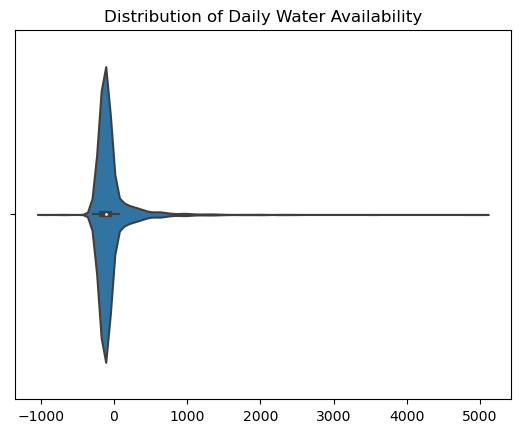

<Figure size 1000x600 with 0 Axes>

In [123]:
sns.violinplot(df_copy['Water_availability'].values,linewidth=1.5)
plt.title('Distribution of Daily Water Availability')
plt.figure(figsize=(10,6))
plt.show()

**Using IQR to find out the Outliers**

In [124]:
# checking for outliers

# First Quartile Q1
Q1 = df_copy['Water_availability'].quantile(0.25)

# Third Quartile Q3
Q3 = df_copy['Water_availability'].quantile(0.75)

# Interquartile range
IQR = Q3-Q1

# Upper and lower bounds
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

# filtering the dataframe to find out the outliers
outlier_df = df_copy[(df_copy['Water_availability']<lower_bound)|(df_copy['Water_availability']>upper_bound)]

In [125]:
outlier_df.shape

(383, 37)

**Using Lagplot**

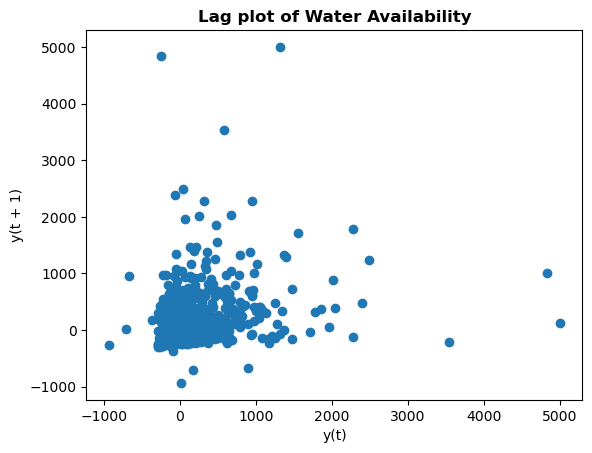

In [126]:
pd.plotting.lag_plot(df_copy['Water_availability'],lag=1)
plt.title("Lag plot of Water Availability",fontweight='bold')
plt.show()

In [127]:
df_copy.shape

(3013, 37)

In [128]:
df_copy1 = df_copy.copy()
df_copy1.set_index('date',inplace=True)

In [136]:
import plotly.graph_objects as go

fig = px.line(df_copy1,y=df_copy1['Water_availability'],title='Time Series of water availability')
fig.update_layout(
        font=dict(size=12, color='black'),
        autosize=False,
        width=1000,
        height=800,
        showlegend=True,
        legend=dict(
            x=1.02,
            y=0.98,
            traceorder='normal'
        )
    )
fig.update_traces(line_color='#147852',name='Water Availability')
fig.add_trace(
    go.Scatter(x=df_copy1.index,y=df_copy1['Water_demand'],
    mode='lines',line=dict(color='red'),name='Water Demand')
)
fig.show()

### **Saving the entire dataset**

In [137]:
# dropping the following columns: 
# year, population, Precipitation in MLD, Evapotranspiration in MLD, Surface Water Runoff in MLD
df_copy.drop(['year','population','Precipitation in MLD','Evapotranspiration in MLD','Surface Water Runoff in MLD','Water_demand','del_S','Water_Supply'],axis=1,inplace=True)

# creating a path for the final data 
file = os.path.join(final_data_dir, "Bhopal_CompleteData_Final_Modified.csv")
# converting the dataframe into a csv file
df_copy.to_csv(file,index=False,encoding='utf-8-sig')

In [138]:
df_copy.head()

,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,date,ACond_tavg,AvgSurfT_tavg,...,Qs_tavg,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg,precipitation_sum,Water_availability
0,31.381519,0.005640,19.084161,4.671449,-0.277626,19.053919,0.0,2015-04-01,0.009535,301.828791,...,0.000000e+00,301.828791,1153.966420,275.946408,4.782809,223.362352,6.349899e-07,1153.966582,0.0,-112.673746
1,31.612318,0.006702,22.664057,5.663895,-0.951907,19.920647,0.0,2015-04-02,0.011490,302.765242,...,0.000000e+00,302.765242,1151.749923,274.617967,4.659694,221.923497,4.469356e-07,1151.749969,0.0,-111.269587
2,30.854070,0.006804,23.969701,5.704286,-0.857162,19.664423,0.0,2015-04-03,0.012793,303.068777,...,0.000000e+00,303.068777,1149.649158,273.428841,4.484641,218.171090,3.210499e-07,1149.649124,0.0,-106.525412
3,30.046127,0.008165,30.080859,2.575579,-1.547093,24.770628,0.0,2015-04-04,0.014474,302.893081,...,0.000000e+00,302.893081,1147.826225,272.525414,4.354961,217.789598,2.082960e-07,1147.826188,0.0,-90.917171
4,30.523074,0.007366,26.557658,-0.549178,-0.442961,23.765168,0.0,2015-04-05,0.010641,302.875925,...,1.183570e-09,302.875925,1146.413800,272.040991,4.340641,175.870913,1.475418e-07,1146.414677,0.0,-82.613718


In [139]:
df_copy.shape

(3013, 29)

In [141]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m_above_ground,3013.0,1.170263e+15,6.423665e+16,1.431998e+01,2.252061e+01,2.612038e+01,3.118930e+01,3.526001e+18
specific_humidity_2m_above_ground,3013.0,1.265419e-02,1.578500e-01,2.064001e-03,5.122659e-03,7.250272e-03,1.608972e-02,8.668938e+00
relative_humidity_2m_above_ground,3013.0,4.428538e+01,2.451547e+01,6.948661e+00,2.395780e+01,3.841328e+01,6.497987e+01,9.153140e+01
u_component_of_wind_10m_above_ground,3013.0,1.583059e+00,5.018913e+00,-5.569351e+00,-7.010918e-01,1.315082e+00,3.703115e+00,2.420341e+02
v_component_of_wind_10m_above_ground,3013.0,-7.306259e-01,1.086218e+00,-4.556643e+00,-1.417936e+00,-8.412887e-01,-8.916314e-02,1.673568e+01
precipitable_water_entire_atmosphere,3013.0,2.972114e+01,1.818690e+01,4.866504e+00,1.475867e+01,2.198979e+01,4.862812e+01,6.688052e+01
total_precipitation_surface,3013.0,5.511053e-01,9.644659e-01,-9.702911e-01,9.409269e-04,3.212630e-02,7.338113e-01,7.303167e+00
ACond_tavg,3013.0,1.206894e-02,3.910726e-03,6.004456e-03,9.119816e-03,1.121149e-02,1.422853e-02,3.471947e-02
AvgSurfT_tavg,3013.0,2.996920e+02,6.952602e+00,2.837911e+02,2.943725e+02,2.991590e+02,3.041229e+02,3.168918e+02
CanopInt_tavg,3013.0,8.766199e-03,1.555391e-02,1.041701e-06,7.683840e-05,6.399119e-04,1.014490e-02,8.288598e-02


### **Splitting the dataset**

In [142]:
# training dataset is from 2015 to 2021
training_data = df_copy[df_copy['date']<='2021-12-01']
# testing dataset is from 2022 to 2023
testing_data = df_copy[df_copy['date']>='2022-01-01']

In [143]:
training_data.shape

(2437, 29)

In [144]:
testing_data.shape

(546, 29)

In [145]:
training_data.head()

,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,date,ACond_tavg,AvgSurfT_tavg,...,Qs_tavg,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg,precipitation_sum,Water_availability
0,31.381519,0.005640,19.084161,4.671449,-0.277626,19.053919,0.0,2015-04-01,0.009535,301.828791,...,0.000000e+00,301.828791,1153.966420,275.946408,4.782809,223.362352,6.349899e-07,1153.966582,0.0,-112.673746
1,31.612318,0.006702,22.664057,5.663895,-0.951907,19.920647,0.0,2015-04-02,0.011490,302.765242,...,0.000000e+00,302.765242,1151.749923,274.617967,4.659694,221.923497,4.469356e-07,1151.749969,0.0,-111.269587
2,30.854070,0.006804,23.969701,5.704286,-0.857162,19.664423,0.0,2015-04-03,0.012793,303.068777,...,0.000000e+00,303.068777,1149.649158,273.428841,4.484641,218.171090,3.210499e-07,1149.649124,0.0,-106.525412
3,30.046127,0.008165,30.080859,2.575579,-1.547093,24.770628,0.0,2015-04-04,0.014474,302.893081,...,0.000000e+00,302.893081,1147.826225,272.525414,4.354961,217.789598,2.082960e-07,1147.826188,0.0,-90.917171
4,30.523074,0.007366,26.557658,-0.549178,-0.442961,23.765168,0.0,2015-04-05,0.010641,302.875925,...,1.183570e-09,302.875925,1146.413800,272.040991,4.340641,175.870913,1.475418e-07,1146.414677,0.0,-82.613718


In [146]:
testing_data.head()

,temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,date,ACond_tavg,AvgSurfT_tavg,...,Qs_tavg,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg,precipitation_sum,Water_availability
2467,18.301797,0.007695,56.643939,-1.643093,-0.584867,22.510895,0.161284,2022-01-01,0.009205,290.077060,...,0.000000e+00,290.077060,1227.250693,301.478202,5.937676,113.089359,0.000004,1227.251248,0.0,-144.592233
2468,17.857911,0.007962,60.310401,-1.488433,-0.309931,22.516758,0.353586,2022-01-02,0.009172,290.599721,...,8.377777e-11,290.599721,1226.658935,301.252813,5.921228,123.678205,0.000005,1226.660441,0.0,-150.352289
2469,18.092715,0.008071,60.935248,-1.673682,-0.380697,22.784478,0.337878,2022-01-03,0.007890,290.406086,...,0.000000e+00,290.406086,1226.006339,300.971606,5.913948,129.075918,0.000005,1226.007440,0.0,-150.702989
2470,18.292371,0.008296,62.098417,-1.343831,-0.674816,22.987746,0.258376,2022-01-04,0.007410,291.271647,...,0.000000e+00,291.271647,1225.183216,300.527585,5.874026,132.073751,0.000006,1225.183737,0.0,-160.638416
2471,17.985828,0.008540,64.981693,-1.196424,-0.982014,22.589843,0.251203,2022-01-05,0.010040,292.962801,...,1.365109e-06,292.962801,1225.057776,300.794211,6.123887,109.031300,0.000006,1225.091514,0.2,-158.698003


In [147]:
# saving the training & testing data
training_file = os.path.join(final_data_dir,"train_bhopal_final_Modified.csv")
training_data.to_csv(training_file,index=False,encoding='utf-8-sig')

testing_file = os.path.join(final_data_dir,"test_bhopal_final_Modified.csv")
testing_data.to_csv(testing_file,index=False,encoding='utf-8-sig')